In [2]:
import numpy as np
import math
import pandas as pd
import copy


In [3]:
#Inverse branches
def t(x,i):
    if i == 1 :
        a = x/2
        return a
    else:
        a = (x+1)/2
        return a

def inv(x,n):
    return math.floor(x*n)

#Composition with t(x,j)
def tf(F,j):
    n = F.size
    Aux = copy.deepcopy(F)
    
    for i in range(n):
        x = i/n
        x = t(x,j)
        Aux[i] = F[inv(x,n)]
    return Aux

#Potential
def A(x):
    return -(x-1/3)*(x-1/3)

#Iterate G, N times with n-point mesh j/n 
def G(N,n):
    F = np.zeros(n)
    for i in range(N):
        F1 = tf(F,1)
        F2 = tf(F,2)
        for j in range(n):
            F1[j] = F1[j] + A(t(j/n,1))
            F2[j] = F2[j] + A(t(j/n,2))
        F = (np.maximum(F1,F2)+F)/2
        F = F - np.amax(F)
    return [F,F1,F2]

#Maximal value
def M(F):
    res=0
    n = len(F)
    res = F[math.floor(n/2)]-F[0]+A(1/2)
    return print(res)

-0.031756949172761714


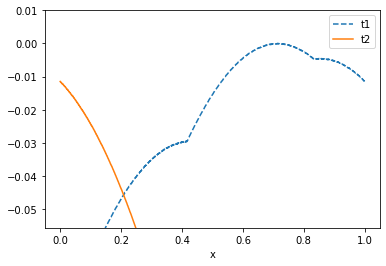

In [4]:
n = 2000
N = 15
Result = G(N,n)
M(Result[0])
F1 = Result[1]
F2 = Result[2]
yup = max(np.amax(F1),np.amax(F2))
F1 = F1 - yup
F2 = F2 - yup

F = list(F1)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","t1"])

F = list(F2)
X = list(np.array(range(n))/n)
D = list(zip(X,F))

Resultd2 = pd.DataFrame(data = D ,columns = ["x","t2"])

ymin = np.amin(Result[0])

##PLOT
ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],style = '--');
Resultd2.plot(ax=ax,x = Resultd2.columns.values[0], y = Resultd2.columns.values[1]);
ax.set_ylim([ymin-0.01,0.01])


#save plot
ax.figure.savefig('../imagens/ex1_branches.pdf')

In [15]:
#DEFINE EXPLICIT BRANCHES

def V1(x):
    return 10/63 - 2*x/21 - x*x/3

def V2(x):
    return 5/63 + 2*x/7 - x*x/3

def V3(x):
    return x*10/21 - x*x/3

def V4(x):
    return -5/63 + 4*x/7 - x*x/3

def V(n,j):
    F = np.zeros(n)
    for i in range(n):
        if j == 1:
            F[i] = V1(i/n)
        if j == 2:
            F[i] = V2(i/n)
        if j == 3:
            F[i] = V3(i/n)
        if j == 4:
            F[i] = V4(i/n)
    
    return F

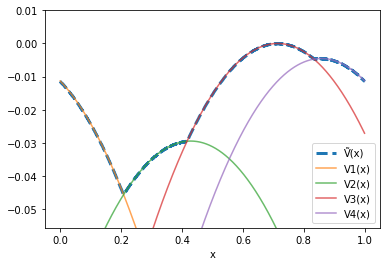

In [16]:
v1 = V(n,1)
v2 = V(n,2)
v3 = V(n,3)
v4 = V(n,4)

yup = np.amax(np.concatenate([v1,v2,v3,v4]))
v1 = v1- yup
v2 = v2- yup
v3 = v3- yup
v4 = v4- yup
ymin = np.amin(Result[0])

F = list(Result[0])
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","Ṽ(x)"])
ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],style = '--',linewidth=3);

F = list(v1)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
dV1 = pd.DataFrame(data = D ,columns = ["x","V1(x)"])
dV1.plot(ax=ax,x = dV1.columns.values[0], y = dV1.columns.values[1],alpha = 0.7);

F = list(v2)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
dV2 = pd.DataFrame(data = D ,columns = ["x","V2(x)"])
dV2.plot(ax=ax,x = dV2.columns.values[0], y = dV2.columns.values[1],alpha = 0.7);

F = list(v3)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
dV3 = pd.DataFrame(data = D ,columns = ["x","V3(x)"])
dV3.plot(ax=ax,x = dV3.columns.values[0], y = dV3.columns.values[1],alpha = 0.7);

F = list(v4)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
dV4 = pd.DataFrame(data = D ,columns = ["x","V4(x)"])
dV4.plot(ax=ax,x = dV4.columns.values[0], y = dV4.columns.values[1],alpha = 0.7);



ax.set_ylim([ymin-0.01,0.01])

ax.figure.savefig('../imagens/ex1_compare.pdf')
